In [59]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense , Dropout ,Activation
from keras.layers import Conv2D, MaxPool2D , GlobalMaxPooling2D

In [60]:
## data agumentation-- it is a technique to increse the number of traning data
## from which you can artifically expand the sixe of dataset
## it is done to increase the accuracy of the model

batch_size = 32
num_classes = 10
data_agumentation = True

In [61]:
## we split it into tranning and testing 
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [62]:
## converrt class vector to binary class matrices
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [63]:
# y_train = [0,2,1]
# num_class = 3
# yy_train = keras.utils.to_categorical(y_train,num_class)


In [64]:
# yy_train
## one hot encoding
##labels integers -- binary c

In [65]:
# ## class                     Lable
#  tshirt                         0
#  trouser                        1
#  pullover                       2
#  dress                          3

# yyy_train = [0,1,2,3,0,0,5]
# yy_train = keras.utils.to_categorical(yyy_train,num_class)
# yy_train

In [66]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## normalise the data --- range ma leke ana data ko
x_train /=255
x_test /=255


In [67]:
## model define
model = Sequential()
##  convolutional layer -- feature extract 
## pooling
##flatten
## Dense


#32 == no of filters/kernel
#(3,3) == kernel size
## normal distrubution == random normal ,,, mean= 0 and std = 1 (by default)
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                input_shape = x_train.shape[1:]))

model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3),kernel_initializer="random_normal",
                input_shape = x_train.shape[1:]))

model.add(GlobalMaxPooling2D())
model.add (Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 20, 20, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_5          │ (None, 32)             │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │        16,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_45 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,646 (268.15 KB)

 Trainable params: 68,646 (268.15 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSProp',
              metrics = ['accuracy'])

In [69]:
## 32 image 
ml = model.fit(x_train, y_train,
               batch_size = batch_size,
               epochs = 50 ,
               validation_data = (x_test, y_test),
               shuffle = True)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 132ms/step - accuracy: 0.2271 - loss: 2.0510 - val_accuracy: 0.3874 - val_loss: 1.6107
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 169s 108ms/step - accuracy: 0.4150 - loss: 1.5768 - val_accuracy: 0.4146 - val_loss: 1.5984
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 131ms/step - accuracy: 0.4882 - loss: 1.4110 - val_accuracy: 0.5288 - val_loss: 1.3149
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 214s 137ms/step - accuracy: 0.5313 - loss: 1.3092 - val_accuracy: 0.5546 - val_loss: 1.2482
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.5626 - loss: 1.2261 - val_accuracy: 0.5549 - val_loss: 1.2447
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.5825 - loss: 1.1733 - val_accuracy: 0.5333 - val_loss: 1.3253
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.6009 - loss: 1.1197 - val_accuracy: 0.5721 - val_loss: 1.2007
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accur

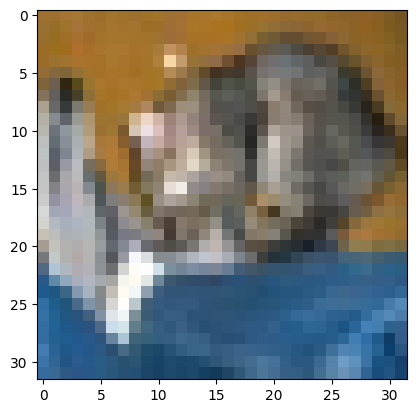

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
6


In [72]:
import numpy as np
import matplotlib.pyplot as plt
img = x_test[0]
plt.imshow(img)
plt.show()
## expad the dimesions to make it batch-size 1
img_expanded = np.expand_dims(img,axis = 0)

#predict
prediction = model.predict(img_expanded)
predicted_class = np.argmax(prediction)
print(predicted_class)

## class_name = [pdh
#'airplane','automobile', 'bird]

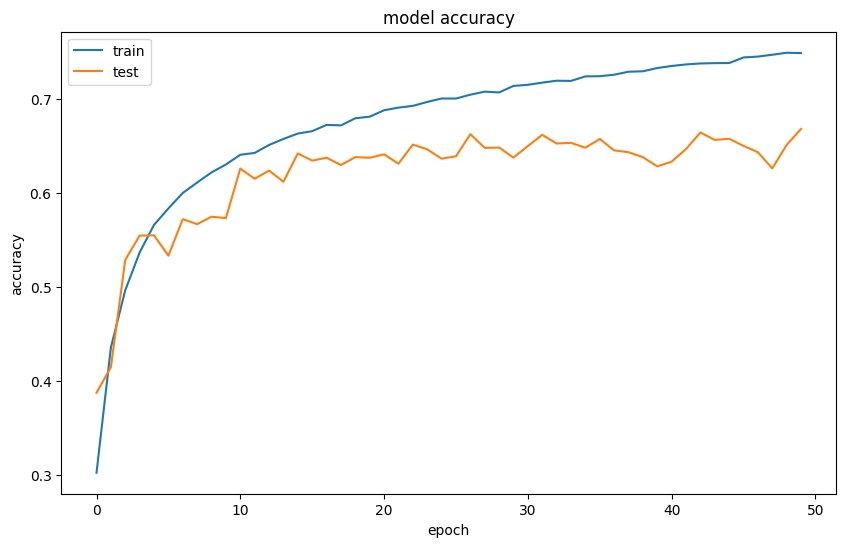

In [73]:
# zcc compare between validation and train dataset
plt.figure(figsize=(10,6))
plt.plot(ml.history['accuracy'])
plt.plot(ml.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()